### This notebook produces Figure 2a and 2b in the paper "iCSD produces spurious results in dense electrode arrays"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
%matplotlib widget

In [15]:
plt.rcParams.update({'font.size': 12})

In [2]:
def contribution(dn,z2d):

    '''
    This function calculates the contribution to the CSD for a  2D Gaussian current distribution centered on the electrode array
    dn is the width of the Gaussian, normalized to the inter-electrode spacing
    z2d is the height of the Gaussian above the electrode, normalized to dn
    '''
    
    prefactor = -1/dn * np.sqrt(2)*np.pi**(3/2)
    
    term1 = -2 * np.exp((z2d*dn)**2/2) * erfc(dn*z2d/np.sqrt(2))
    term2 = np.exp(((1+z2d)*dn)**2/2) * erfc(dn*(1+z2d)/np.sqrt(2))
    term3 = np.exp(((1-z2d)*dn)**2/2) * erfc(np.abs(dn*(1-z2d))/np.sqrt(2))
    
    return prefactor *(term1+term2+term3)

In [3]:

dn_max = 9
dn = np.linspace(0,dn_max,1000)

z2d_max = 3

z2d = np.linspace(0,z2d_max,1000)

DD, ZZ = np.meshgrid(dn,z2d)
c = contribution(DD,ZZ)

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2533463/ipykernel_41873/1411346796.py:9: RuntimeWarning: divide by zero encountered in divide
  prefactor = -1/dn * np.sqrt(2)*np.pi**(3/2)
/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2533463/ipykernel_41873/1411346796.py:15: RuntimeWarning: invalid value encountered in multiply
  return prefactor *(term1+term2+term3)


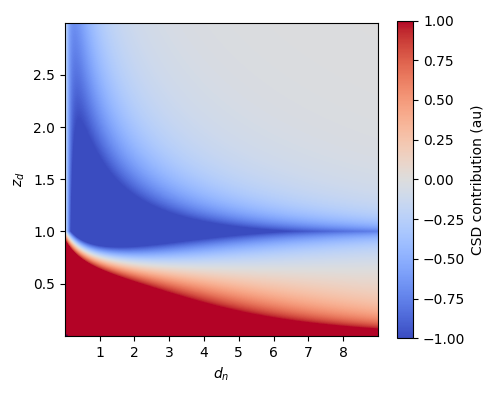

In [4]:
### This cell plots Figure 2 a

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

ax.contour(DD,ZZ,c,levels=[0])

im = plt.imshow(c,cmap='coolwarm',vmin=-1,vmax=1,origin='lower')

desired_xticklabels = np.arange(1,9)
desired_xticks = len(dn)/(dn_max/desired_xticklabels)

ax.set_xticks(desired_xticks)
ax.set_xticklabels(desired_xticklabels)

desired_yticklabels = np.arange(0.5,3,.5)
desired_yticks = len(z2d)/(z2d_max/desired_yticklabels)

ax.set_yticks(desired_yticks)
ax.set_yticklabels(desired_yticklabels)


plt.colorbar(im,label='CSD contribution (au)')
ax.set_ylabel('$z_d$')
ax.set_xlabel('$d_n$')

plt.tight_layout()

plt.savefig('figures/analytic.png',dpi=600)
plt.show()

In [10]:

dn_max = 0.01
dn = np.linspace(0,dn_max,1000)

z2d_max = 3

z2d = np.linspace(0,z2d_max,1000)

DD, ZZ = np.meshgrid(dn,z2d)
c = contribution(DD,ZZ)

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2533463/ipykernel_41873/1411346796.py:9: RuntimeWarning: divide by zero encountered in divide
  prefactor = -1/dn * np.sqrt(2)*np.pi**(3/2)
/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2533463/ipykernel_41873/1411346796.py:15: RuntimeWarning: invalid value encountered in multiply
  return prefactor *(term1+term2+term3)


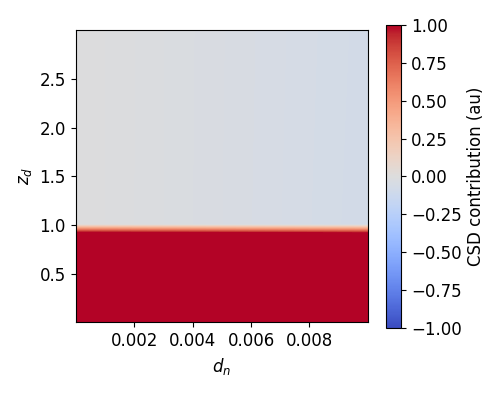

In [16]:
### This cell plots Figure 2 b

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

ax.contour(DD,ZZ,c,levels=[0])

im = plt.imshow(c,cmap='coolwarm',vmin=-1,vmax=1,origin='lower')

desired_xticklabels = np.array([0.002,0.004,0.006,0.008])
desired_xticks = len(dn)/(dn_max/desired_xticklabels)

ax.set_xticks(desired_xticks)
ax.set_xticklabels(desired_xticklabels)


desired_yticklabels = np.arange(0.5,3,.5)
desired_yticks = len(z2d)/(z2d_max/desired_yticklabels)

ax.set_yticks(desired_yticks)
ax.set_yticklabels(desired_yticklabels)


plt.colorbar(im,label='CSD contribution (au)')
ax.set_ylabel('$z_d$')
ax.set_xlabel('$d_n$')

plt.tight_layout()
plt.savefig('figures/analytic_smallDn.png',dpi=600)